In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
# Loading the dataset
df = pd.read_csv("../../Dataset/cleaned_used_cars_v2.csv")
df.columns

Index(['price', 'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType',
       'brand', 'notRepairedDamage'],
      dtype='object')

In [10]:
dummies = pd.get_dummies(df.drop(['dateCrawled','lastSeen','dateCreated','name'], axis=1), columns=['seller', 'offerType','abtest','vehicleType','gearbox','model','fuelType','brand','notRepairedDamage'])
df_preprocessed = pd.concat([df.drop(['price','index','dateCrawled','lastSeen','yearOfRegistration','monthOfRegistration','nrOfPictures','postalCode',
             'name','seller','offerType','abtest','vehicleType','gearbox','model','fuelType','brand','notRepairedDamage','dateCreated'], axis=1),
                             dummies], axis=1)

KeyError: "['dateCrawled', 'lastSeen', 'dateCreated', 'name'] not found in axis"

In [ ]:
X = df_preprocessed
y = df['price'].apply(lambda x: 1 if x > 10000 else 0)
X = X.T.drop_duplicates().T

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train the logistic regression model
clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Evaluate the performance of the model
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
# Evaluating the performance of the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:

print("Accuracy:", accuracy)
print("Mean squared error: ", mse)
print("R-squared value: ", r2)

# Use the trained model to predict the price category of a used car
sample = X_test.iloc[0]
actual_price = y_test.iloc[0]
sample_scaled = scaler.transform([sample])
predicted_price_category = clf.predict(sample_scaled)[0]

if predicted_price_category == 1:
    predicted_price_range = "greater than $10,000"
else:
    predicted_price_range = "less than or equal to $10,000"

print("Actual Price Category:", "greater than $10,000" if actual_price == 1 else "less than or equal to $10,000")
print("Predicted Price Category:", predicted_price_range)

Accuracy: 0.9905970850963799
Mean squared error:  0.009402914903620122
R-squared value:  0.9349781884990569
Actual Price Category: less than or equal to $10,000
Predicted Price Category: less than or equal to $10,000


c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve


c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


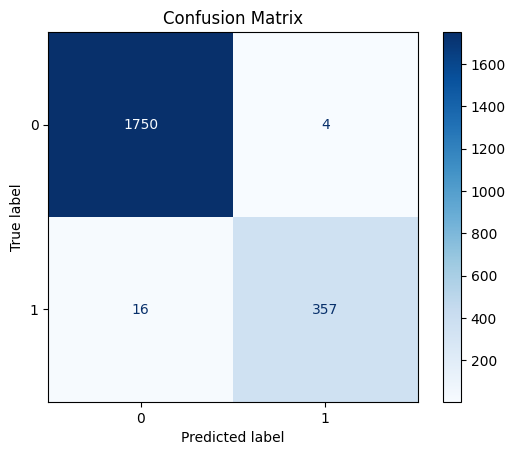

In [ ]:
# Generate and plot the confusion matrix
plot_confusion_matrix(clf, X_test_scaled, y_test, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


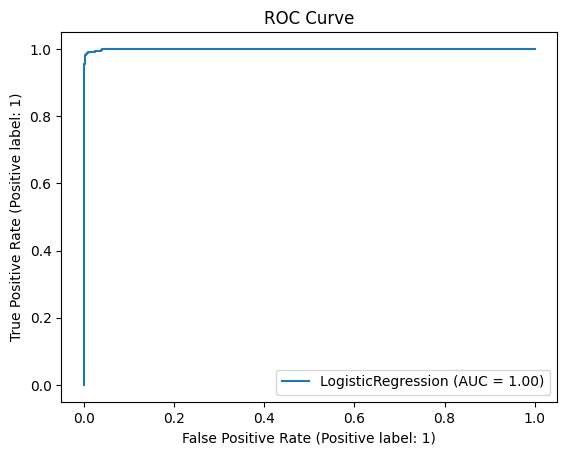

In [ ]:
# Generate and plot the ROC curve
plot_roc_curve(clf, X_test_scaled, y_test)
plt.title("ROC Curve")
plt.show()

c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


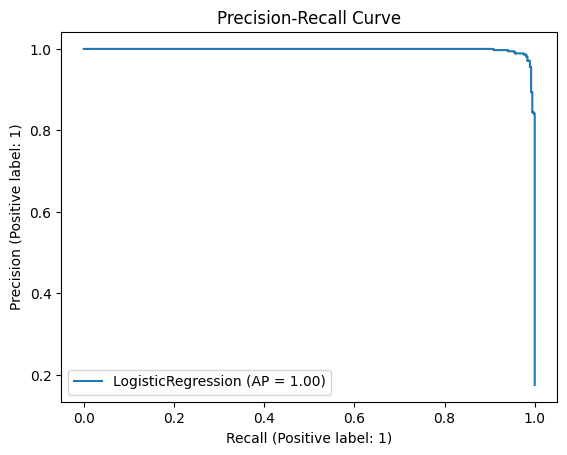

In [ ]:
# Generate and plot the precision-recall curve
plot_precision_recall_curve(clf, X_test_scaled, y_test)
plt.title("Precision-Recall Curve")
plt.show()

In [ ]:
X

,powerPS,kilometer,index,price,yearOfRegistration,monthOfRegistration,nrOfPictures,postalCode,seller_private,abtest_control,...,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_no,notRepairedDamage_yes
0,50,40000,7,0,1980,7,0,19348,1,0,...,0,0,0,0,0,0,1,0,1,0
1,118,150000,24,500,1990,10,0,35390,1,0,...,0,0,0,0,0,0,0,0,0,1
2,129,150000,38,11900,2002,11,0,10551,1,0,...,0,0,0,0,0,0,1,0,1,0
3,75,150000,211,999,1995,10,0,76597,1,0,...,0,0,0,0,0,0,1,0,1,0
4,170,150000,337,11700,2008,7,0,91717,1,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10626,163,150000,371070,999,1997,8,0,22159,1,0,...,0,0,0,0,0,0,0,0,1,0
10627,68,80000,371126,3250,2010,6,0,31228,1,1,...,0,0,0,0,0,0,0,0,0,1
10628,68,60000,371153,4900,2011,3,0,30629,1,0,...,0,0,0,0,1,0,0,0,1,0
10629,116,150000,371256,6499,1996,12,0,83064,1,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
X['kilometer']

0         40000
1        150000
2        150000
3        150000
4        150000
          ...  
10626    150000
10627     80000
10628     60000
10629    150000
10630    150000
Name: kilometer, Length: 10631, dtype: int64

In [ ]:
X

,powerPS,kilometer,index,price,yearOfRegistration,monthOfRegistration,nrOfPictures,postalCode,seller_private,abtest_control,...,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notRepairedDamage_no,notRepairedDamage_yes
0,50,40000,7,0,1980,7,0,19348,1,0,...,0,0,0,0,0,0,1,0,1,0
1,118,150000,24,500,1990,10,0,35390,1,0,...,0,0,0,0,0,0,0,0,0,1
2,129,150000,38,11900,2002,11,0,10551,1,0,...,0,0,0,0,0,0,1,0,1,0
3,75,150000,211,999,1995,10,0,76597,1,0,...,0,0,0,0,0,0,1,0,1,0
4,170,150000,337,11700,2008,7,0,91717,1,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10626,163,150000,371070,999,1997,8,0,22159,1,0,...,0,0,0,0,0,0,0,0,1,0
10627,68,80000,371126,3250,2010,6,0,31228,1,1,...,0,0,0,0,0,0,0,0,0,1
10628,68,60000,371153,4900,2011,3,0,30629,1,0,...,0,0,0,0,1,0,0,0,1,0
10629,116,150000,371256,6499,1996,12,0,83064,1,1,...,0,0,0,0,0,0,0,0,1,0


In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import random



from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR

from xgboost import XGBRegressor

# Loading the dataset
df = pd.read_csv("../../Dataset/cleaned_used_cars_v3.csv")
print(df.columns)


X = df.drop(['price'], axis=1)
y = df['price']
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {
    "Linear Regressor":LinearRegression(),
    "Lasso Regressor":Lasso(alpha=.8),
    "Ridge Regressor":Ridge(alpha=1e-10),
    # "Decision Tree Regressor":DecisionTreeRegressor(),
    # "Random Forest Regressor":RandomForestRegressor(),
    # "Gradient Boosting Regressor":GradientBoostingRegressor(),
    # "SVR":SVR(kernel='rbf', C=10, gamma=0.1)
}


# Looping through each model, fitting it to the training data, and evaluating its performance
for name, model in models.items():
    # Fitting the model to the training data
    model.fit(X_train, y_train)
    
    # Making predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluating the model's performance using mean squared error and R-squared value
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: Mean squared error: {mse}, R-squared value: {r2}")

     # Printing a sample of predicted and actual prices
    print("Sample of predicted and actual prices:")
    sample_indices = random.sample(range(len(y_test)), 5)
    for i in sample_indices:
        print(f"Predicted price: {y_pred[i]}, Actual price: {y_test.iloc[i]}")
    
    
    # # Evaluating the model's performance using cross-validation
    # scores = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
    # print(f"Cross-validation scores for {name}: {np.sqrt(-scores)}, Mean RMSE: {np.sqrt(-scores.mean())}\n")

Index(['seller', 'offerType', 'price', 'abtest', 'gearbox', 'powerPS',
       'kilometer', 'notRepairedDamage', 'vehicleType.andere',
       'vehicleType.bus',
       ...
       'year_range.[1970, 1975)', 'year_range.[1975, 1980)',
       'year_range.[1980, 1985)', 'year_range.[1985, 1990)',
       'year_range.[1990, 1995)', 'year_range.[1995, 2000)',
       'year_range.[2000, 2005)', 'year_range.[2005, 2010)',
       'year_range.[2010, 2015)', 'year_range.[2015, 2020)'],
      dtype='object', length=329)
Linear Regressor: Mean squared error: 5629306.629838656, R-squared value: 0.6470458120579049
Sample of predicted and actual prices:
Predicted price: 4593.9140625, Actual price: 2650.0
Predicted price: 2983.4375, Actual price: 1200.0
Predicted price: 6704.703125, Actual price: 7200.0
Predicted price: 4203.6796875, Actual price: 4650.0
Predicted price: 8168.5390625, Actual price: 10990.0
Lasso Regressor: Mean squared error: 4486051.812425672, R-squared value: 0.7187272112469295
Sample o